In [143]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
from enz_rxn_data.mechanism import get_overall_reaction
from ergochem.draw import draw_reaction, draw_molecule
from ergochem.standardize import standardize_mol
from IPython.display import SVG
import pandas as pd
import ast

In [144]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    filepaths = compose(config_name="filepaths")

In [145]:
entries = {}
for i in range(0, 11):
    with open(Path(filepaths.raw_mcsa) / f"entries_{i}.json", "r") as f:
        entries = {**entries, **json.load(f)}

In [146]:
mech_df = pd.read_csv(Path(filepaths.processed_data) / 'mcsa' / 'mech_labeled_reactions.csv', sep=",")
mech_df['mech_atoms'] = mech_df['mech_atoms'].apply(lambda x: ast.literal_eval(x))
mech_df.head()

,entry_id,mechanism_id,smarts,mech_atoms
0,49,1,[CH2:45]([CH:47]([NH3+:46])[C:49](=[O:48])[O-:...,"[[47, 46, 49, 50]]"
1,43,1,[OH2:74]>>*O.O=P([O-])([O-])O,[[74]]
2,722,1,[C:59]([O-:60])(=[O:61])[C:62](=[O:63])[CH3:64...,"[[62, 63], [30, 33]]"
3,219,1,[P:28]([O:29][CH2:31][CH:30]([CH:33]=[O:36])[O...,"[[33, 36], [28, 29]]"


In [147]:
mech_df.loc[mech_df['entry_id'] == 49, 'mech_atoms'][0]

[[47, 46, 49, 50]]

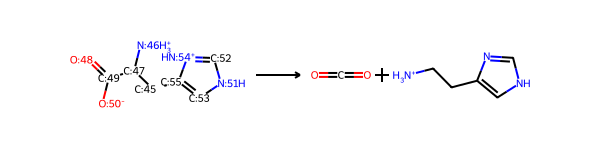

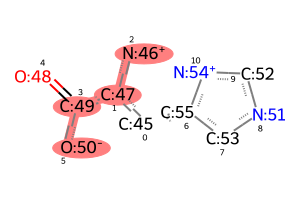

In [148]:
def display_mech_labeled_rxn(entry_id: int, mol_path):
    mech_atom_map_nums = mech_df.loc[mech_df['entry_id'] == entry_id, 'mech_atoms'].iloc[0]


    cpds = entries[str(entry_id)]['reaction']['compounds']
    smarts = mech_df.loc[mech_df['entry_id'] == entry_id, 'smarts'].iloc[0]
    rxn = AllChem.ReactionFromSmarts(smarts, useSmiles=True)
    display(rxn)
    lhs = [Chem.MolFromSmarts(elt) for elt in smarts.split('>>')[0].split('.')]
    involved_atoms = []
    for ams, mol in zip(mech_atom_map_nums, lhs):
        involved_atoms.append([atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomMapNum() in ams])
    for i, rct in enumerate(lhs):
        display(SVG(draw_molecule(rct, size=(300, 200), highlight_atoms=involved_atoms[i], draw_options={"addAtomIndices": True})))


display_mech_labeled_rxn(49, Path(filepaths.mcsa_mols))

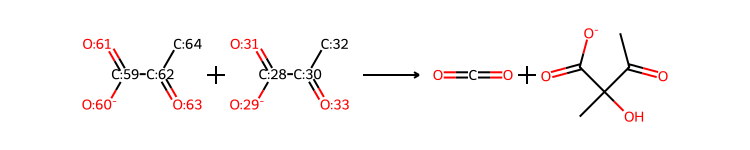

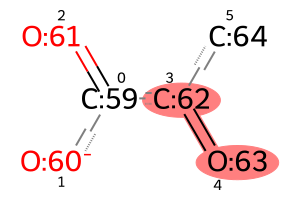

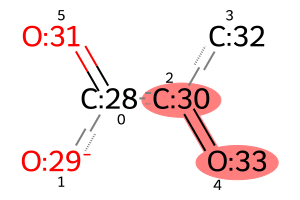

In [149]:
display_mech_labeled_rxn(722, Path(filepaths.mcsa_mols))

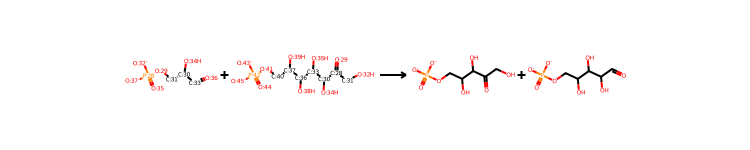

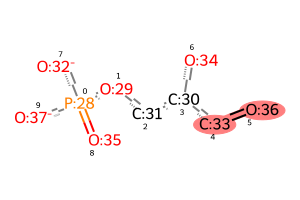

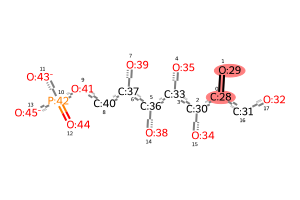

In [150]:
display_mech_labeled_rxn(219, Path(filepaths.mcsa_mols))

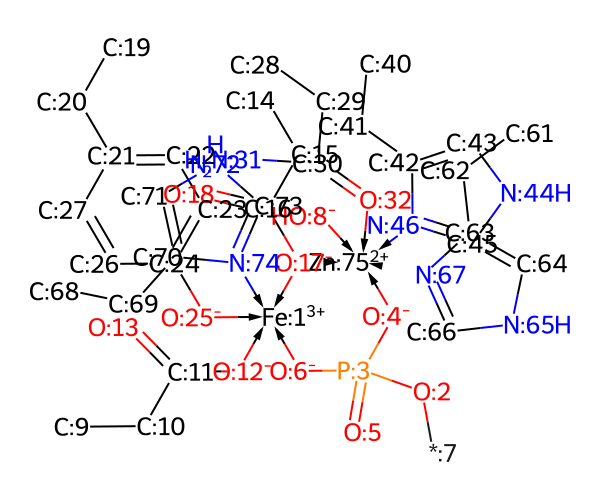

In [125]:
lsma = '[Fe+3:1]1(<-[O-:6][P:3]([O:2][*:7])([O-:4]->[Zn+2:75](<-[OH-:8])(<-[O-:17]->1[C:16]([CH2:15][CH3:14])=[O:18])(<-[O:32]=[C:30]([CH2:29][CH3:28])[NH2:31])(<-[n:46]1[c:42]([CH2:41][CH3:40])[cH:43][nH:44][cH:45]1)<-[n:67]1[c:63]([CH2:62][CH3:61])[cH:64][nH:65][cH:66]1)=[O:5])(<-[O-:12][C:11]([CH2:10][CH3:9])=[O:13])(<-[O-:25][c:24]1[cH:23][cH:22][c:21]([CH2:20][CH3:19])[cH:27][cH:26]1)<-[n:74]1[c:70]([CH2:69][CH3:68])[cH:71][nH:72][cH:73]1'
mol = Chem.MolFromSmiles(lsma)
SVG(draw_molecule(mol, size=(600, 500)))

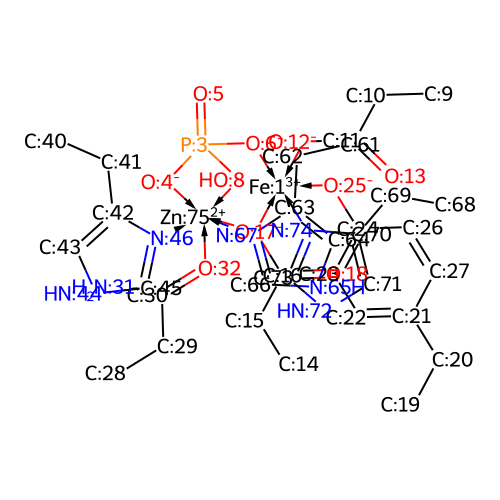

In [126]:
rsma = '[Fe+3:1]1(<-[O-:6][P:3]2([O-:4]->[Zn+2:75](<-[OH:8]2)(<-[O-:17]->1[C:16]([CH2:15][CH3:14])=[O:18])(<-[O:32]=[C:30]([CH2:29][CH3:28])[NH2:31])(<-[n:46]1[c:42]([CH2:41][CH3:40])[cH:43][nH:44][cH:45]1)<-[n:67]1[c:63]([CH2:62][CH3:61])[cH:64][nH:65][cH:66]1)=[O:5])(<-[O-:12][C:11]([CH2:10][CH3:9])=[O:13])(<-[O-:25][c:24]1[cH:23][cH:22][c:21]([CH2:20][CH3:19])[cH:27][cH:26]1)<-[n:74]1[c:70]([CH2:69][CH3:68])[cH:71][nH:72][cH:73]1'
mol = Chem.MolFromSmiles(rsma)
SVG(draw_molecule(mol, size=(500, 500)))

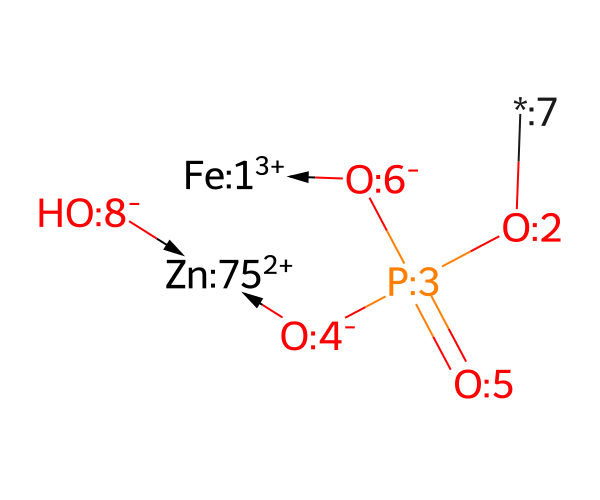

In [116]:
lsma_red = '[Fe+3:1](<-[O-:6][P:3]([O:2][*:7])([O-:4]->[Zn+2:75](<-[OH-:8]))=[O:5])'
mol = Chem.MolFromSmiles(lsma_red)
SVG(draw_molecule(mol, size=(600, 500)))

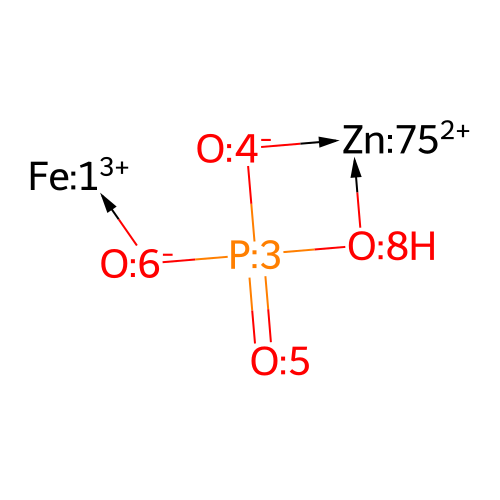

In [117]:
rsma_red = '[Fe+3:1](<-[O-:6][P:3]2([O-:4]->[Zn+2:75](<-[OH:8]2))=[O:5])'
mol = Chem.MolFromSmiles(rsma_red)
SVG(draw_molecule(mol, size=(500, 500)))

In [134]:
rule_red = lsma_red + '>>' + rsma_red
rxn_red = AllChem.ReactionFromSmarts(rule_red)
rxn_red.RunReactants([Chem.MolFromSmiles(lsma_red)])

[10:39:33] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 7 


((<rdkit.Chem.rdchem.Mol at 0x7f59345b80b0>,),)

In [191]:
rule = lsma + '>>' + rsma
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
new_mol = Chem.MolFromSmarts(Chem.MolToSmarts(Chem.MolFromSmiles(lsma)))
Chem.SanitizeMol(new_mol)
rxn.RunReactants([new_mol])

[12:39:18] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 7 


()

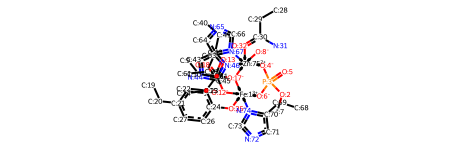

In [188]:
new_mol

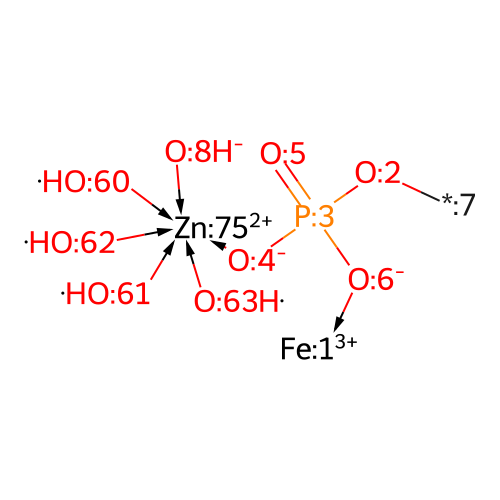

In [200]:
lsma_imt = '[Fe+3:1](<-[O-:6][P:3]([O:2][*:7])([O-:4]->[Zn+2:75](<-[OH-:8])(<-[OH:60])(<-[OH:61])(<-[OH:62])(<-[OH:63]))=[O:5])'
mol = Chem.MolFromSmiles(lsma_imt)
SVG(draw_molecule(mol, size=(500, 500)))

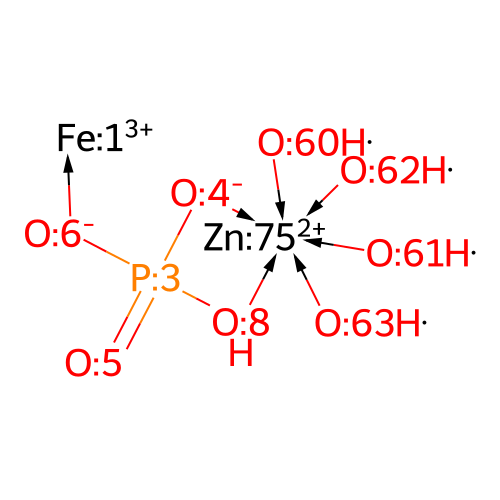

In [201]:
rsma_imt = '[Fe+3:1](<-[O-:6][P:3]2([O-:4]->[Zn+2:75](<-[OH:8]2)(<-[OH:60])(<-[OH:61])(<-[OH:62])(<-[OH:63]))=[O:5])'
mol = Chem.MolFromSmiles(rsma_imt)
SVG(draw_molecule(mol, size=(500, 500)))

In [202]:
rule_imt = lsma_imt + '>>' + rsma_imt
rxn_imt = AllChem.ReactionFromSmarts(rule_imt, useSmiles=False)
rxn_imt.RunReactants([Chem.MolFromSmiles(lsma_imt)])

[12:42:39] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 7 


((<rdkit.Chem.rdchem.Mol at 0x7f5935e87370>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e865e0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87ae0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87b50>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87bc0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87680>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e877d0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87840>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87ca0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87760>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87f40>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87ed0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87c30>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87d10>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87d80>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87df0>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87e60>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87990>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87530>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e87610>,),
 (<rdkit.Chem.rdchem.Mol at 0x7f5935e875a0>,),
 (<rdkit.Chem

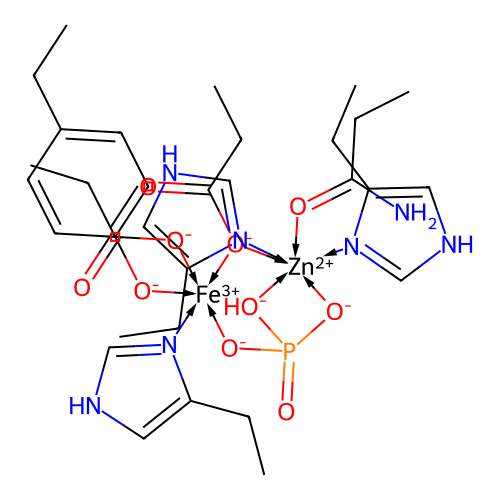

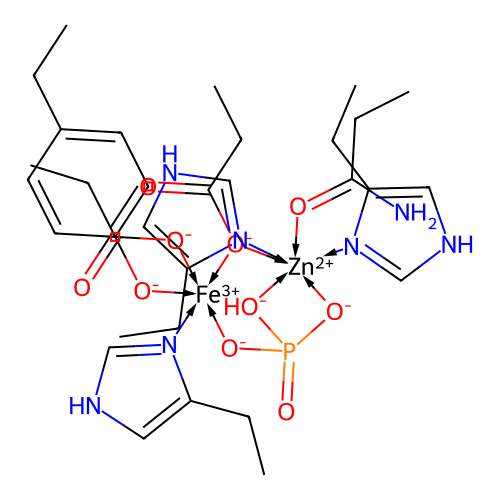

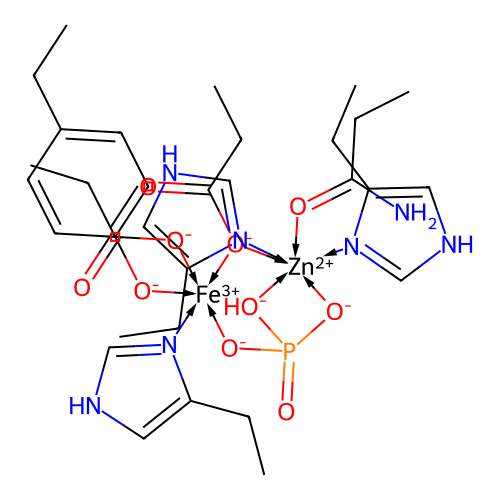

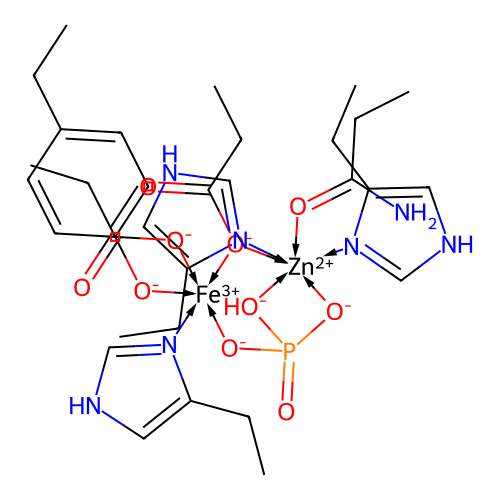

In [138]:
for output in rxn.RunReactants([Chem.MolFromSmiles(lsma)]):
    for mol in output:
        display(SVG(draw_molecule(mol, size=(500, 500))))

In [140]:
for output in rxn.RunReactants([Chem.MolFromSmiles(lsma)]):
    for mol in output:
        print(Chem.MolToSmarts(mol))

[Fe+3]1(<-[#8-]-[#15]2(-[#8-]->[Zn+2](<-[#8H-]-2)(<-[#8-]->1-[#6](-[#6H2]-[#6H3])=[#8])(<-[#8]=[#6](-[#6H2]-[#6H3])-[#7H2])(<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)=[#8])(<-[#8-]-[#6](-[#6H2]-[#6H3])=[#8])(<-[#8-]-[#6]1:[#6H]:[#6H]:[#6](-[#6H2]-[#6H3]):[#6H]:[#6H]:1)<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1
[Fe+3]1(<-[#8-]-[#15]2(-[#8-]->[Zn+2](<-[#8H-]-2)(<-[#8-]->1-[#6](-[#6H2]-[#6H3])=[#8])(<-[#8]=[#6](-[#6H2]-[#6H3])-[#7H2])(<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)=[#8])(<-[#8-]-[#6](-[#6H2]-[#6H3])=[#8])(<-[#8-]-[#6]1:[#6H]:[#6H]:[#6](-[#6H2]-[#6H3]):[#6H]:[#6H]:1)<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1
[Fe+3]1(<-[#8-]-[#15]2(-[#8-]->[Zn+2](<-[#8H-]-2)(<-[#8-]->1-[#6](-[#6H2]-[#6H3])=[#8])(<-[#8]=[#6](-[#6H2]-[#6H3])-[#7H2])(<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)<-[#7]1:[#6](-[#6H2]-[#6H3]):[#6H]:[#7H]:[#6H]:1)=[#8])(<-[#8-]-[#6](-[#6H2]-[#

In [131]:
lmol = Chem.MolFromSmiles(lsma)
rmol = Chem.MolFromSmiles(rsma)
lam = {atom.GetAtomMapNum() for atom in lmol.GetAtoms()}
ram = {atom.GetAtomMapNum() for atom in rmol.GetAtoms()}
lam ^ ram

{2, 7}

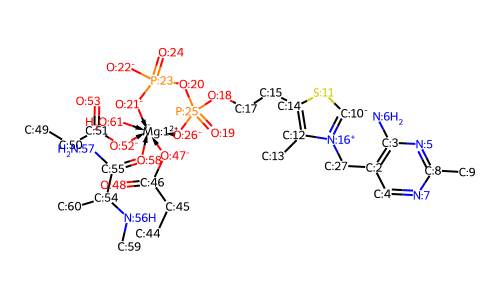

In [156]:
qsmi = '[Mg+2:1]1(<-[O-:21][P:23]([O:20][P:25]([O:18][CH2:17][CH2:15][c:14]2[s:11][c-:10][n+:16]([CH2:27][c:2]3[c:3]([NH2:6])[n:5][c:8]([CH3:9])[n:7][cH:4]3)[c:12]2[CH3:13])(=[O:19])[O-:26]->1)([O-:22])=[O:24])(<-[O-:47][C:46]([CH2:45][CH3:44])=[O:48])(<-[O-:52][C:51]([CH2:50][CH3:49])=[O:53])(<-[O:58]=[C:55]([CH:54]([NH:56][CH3:59])[CH3:60])[NH2:57])<-[OH2:61]'
qmol = Chem.MolFromSmiles(qsmi)
display(SVG(draw_molecule(qmol, size=(500, 300))))

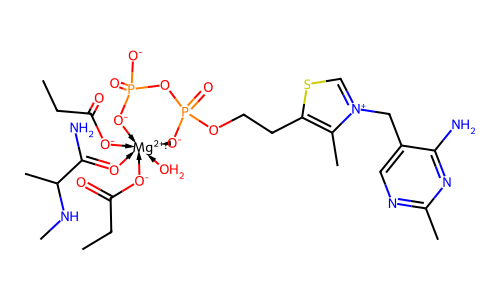

In [160]:
rsmi = 'CCC(=O)[O-]->[Mg+2]1(<-O)(<-O=C(N)C(C)NC)(<-[O-]C(=O)CC)<-[O-]P(=O)([O-])OP(=O)(OCCc2sc[n+](Cc3cnc(C)nc3N)c2C)[O-]->1'
rmol = Chem.MolFromSmiles(rsmi)
display(SVG(draw_molecule(rmol, size=(500, 300))))

In [161]:
qmol.GetSubstructMatch(rmol)

(30,
 29,
 28,
 31,
 27,
 0,
 44,
 37,
 38,
 43,
 39,
 42,
 40,
 41,
 32,
 33,
 36,
 34,
 35,
 1,
 2,
 26,
 25,
 3,
 4,
 23,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 20,
 19,
 17,
 18,
 16,
 14,
 15,
 21,
 22,
 24)

In [162]:
rmol.GetSubstructMatch(qmol)

()

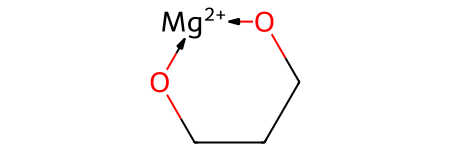

In [307]:
lrule = '[C:1]1[C:2]([C:3])[C:4][O:5]->[Mg+2:6]<-[O:7]1'
rrule = '[C:1]1[C:2][C:4][O:5]->[Mg+2:6]<-[O:7]1.[C:3]'
lmol = Chem.MolFromSmiles(lrule)
rmol = Chem.MolFromSmiles(rrule)
rule = Chem.MolToSmarts(lmol) + '>>' + Chem.MolToSmarts(rmol)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([lmol])[0][0]

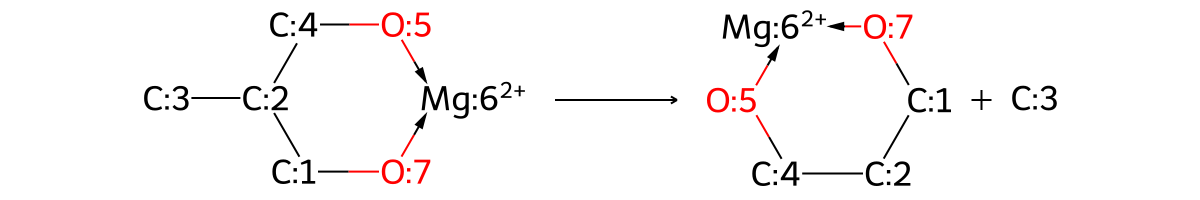

In [308]:
SVG(draw_reaction(rule))

[17:29:36] unsupported number of radical electrons 6


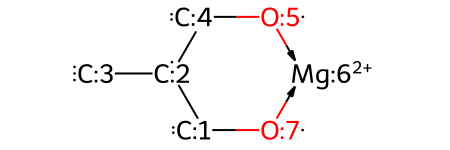

In [309]:
lmol

[17:29:36] unsupported number of radical electrons 4
[17:29:36] unsupported number of radical electrons 6


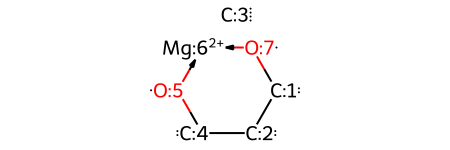

In [310]:
rmol

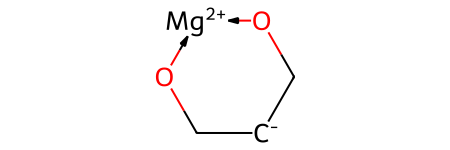

In [312]:
lrule = '[C:1]1[CH:2][C:4][O:5]->[Mg+2:6]<-[O:7]1'
rrule = '[C:1]1[C-:2][C:4][O:5]->[Mg+2:6]<-[O:7]1'
lmol = Chem.MolFromSmiles(lrule)
rmol = Chem.MolFromSmiles(rrule)
rule = Chem.MolToSmarts(lmol) + '>>' + Chem.MolToSmarts(rmol)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([lmol])[0][0]

In [321]:
rule = '[Mg+2:1]1(<-[#8-:21]-[#15:23](-[#8:20]-[#15:25](-[#8:18]-[#6H2:17]-[#6H2:15]-[#6:14]2:[#16:11]:[#6H:10]:[#7+:16](-[#6H2:27]):[#6:12]:2-[#6H3:13])(=[#8:19])-[#8-:26]->1)(-[#8-:22])=[#8:24])>>[Mg+2:1]1(<-[#8-:21]-[#15:23](-[#8:20]-[#15:25](-[#8:18]-[#6H2:17]-[#6H2:15]-[#6:14]2:[#16:11]:[#6-:10]:[#7+:16](-[#6H2:27]):[#6:12]:2-[#6H3:13])(=[#8:19])-[#8-:26]->1)(-[#8-:22])=[#8:24])'
rct_sma = '[Mg+2:1]1(<-[#8-:21]-[#15:23](-[#8:20]-[#15:25](-[#8:18]-[#6H2:17]-[#6H2:15]-[#6:14]2:[#16:11]:[#6H:10]:[#7+:16](-[#6H2:27]):[#6:12]:2-[#6H3:13])(=[#8:19])-[#8-:26]->1)(-[#8-:22])=[#8:24])'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])

()

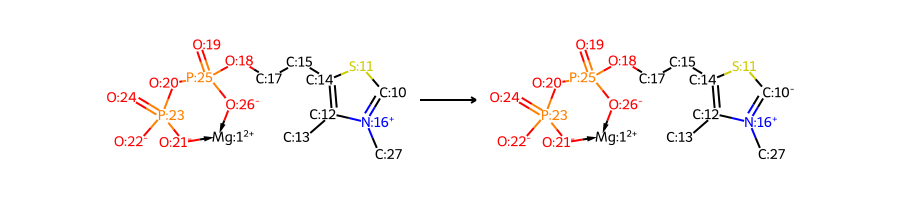

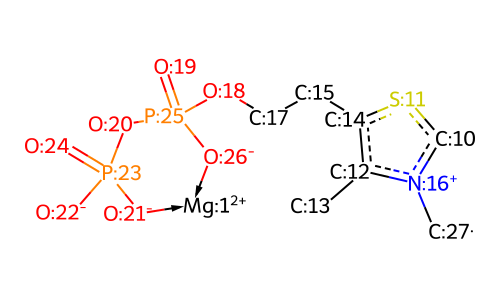

In [324]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(500, 300))))

In [394]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])

()

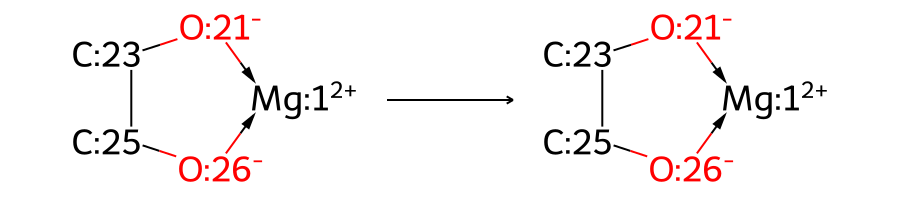

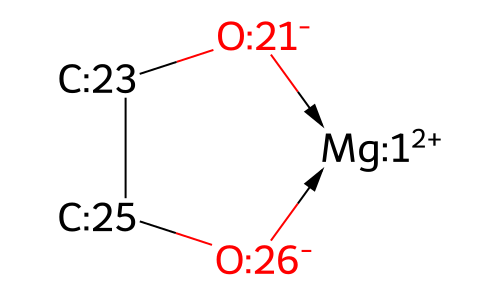

In [383]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(500, 300))))

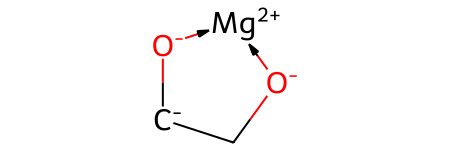

In [393]:
rule = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1>>[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6-:23]-[#6:25]-1'
rct_sma = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])[0][0]

In [ ]:
# display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(500, 300))))

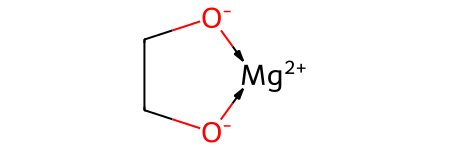

In [392]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=True)
rxn.RunReactants([rct])[0][0]

In [391]:
print(rdkit.__version__)

2024.09.5
